# Model Accuracy Graph

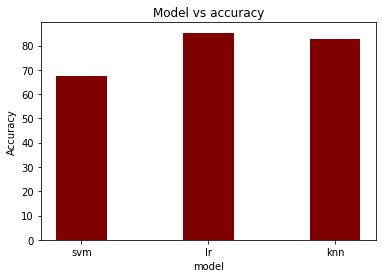

In [1]:
import matplotlib.pyplot as plt
data={"svm":67.4094,"lr":85.267,"knn":82.729}
plt.bar(list(data.keys()), list(data.values()), color ='maroon',width = 0.4)
plt.xlabel("model")
plt.ylabel("Accuracy")
plt.title("Model vs accuracy")
plt.show()

# Accurate

As you can see from graph Logistic Regression is more acurate while doing the classifications

# LR from Scratch

In [2]:
import pandas as pd
data=pd.read_csv('fake_genuine_merge.csv',header=0)
data.head(10)

,username,full_name,is_verified,has_anonymous_profile_picture,biography_len,external_url,followers,following,has_clips,highlight_count,is_professional_account,is_private,media_count,total_tags,total_likes,total_comments,name_length,media_count_of_data_collected,average_likes,is_fake
0,_kriiishnaaa____,Krishna Rajeev,0,0,23,1,920,694,1,6,0,1,44,12,4289,237,14,12,357.416667,0
1,sim.run03,Simran Kathpalia,0,0,27,0,374,379,0,6,0,1,14,17,1473,189,16,12,122.750000,0
2,sarang_dileep_,Sarang Dileep,0,0,0,0,476,554,0,0,0,1,9,1,1086,75,13,9,120.666667,0
3,krishna_manoj._,KRISHNA MANOJ✨,0,0,23,0,524,516,0,5,0,1,0,0,0,0,14,0,0.000000,0
4,ritka_098,Ritika,0,1,0,0,680,775,0,12,0,1,0,0,0,0,6,0,0.000000,0
5,officialcjunior,aswin chandanaveli �️,0,0,36,1,907,916,1,11,1,0,58,17,2484,122,21,12,207.000000,0
6,sidharth.a_s_s,sidhartha sakthidharan,0,0,28,0,506,488,0,0,0,1,13,17,1603,98,22,12,133.583333,0
7,_adil1._,Adil Ashraf,0,0,0,0,1486,809,0,12,1,0,18,82,5816,229,11,12,484.666667,0
8,itzz_me__anu,Anugraha,0,0,32,0,363,433,0,12,0,1,5,7,983,85,8,5,196.600000,0
9,_vipulv,ѴιƤʋ˩ Ѵ,0,0,85,0,422,417,1,12,0,0,16,50,2194,470,7,12,182.833333,0


In [3]:
normalized=pd.read_csv('fake_genuine_merge.csv')
normalized.drop('username',inplace=True,axis=1)
normalized.drop('full_name',inplace=True,axis=1)
data=normalized
data.head()

,is_verified,has_anonymous_profile_picture,biography_len,external_url,followers,following,has_clips,highlight_count,is_professional_account,is_private,media_count,total_tags,total_likes,total_comments,name_length,media_count_of_data_collected,average_likes,is_fake
0,0,0,23,1,920,694,1,6,0,1,44,12,4289,237,14,12,357.416667,0
1,0,0,27,0,374,379,0,6,0,1,14,17,1473,189,16,12,122.750000,0
2,0,0,0,0,476,554,0,0,0,1,9,1,1086,75,13,9,120.666667,0
3,0,0,23,0,524,516,0,5,0,1,0,0,0,0,14,0,0.000000,0
4,0,1,0,0,680,775,0,12,0,1,0,0,0,0,6,0,0.000000,0


In [4]:
Y=data["is_fake"]
X=data.loc[:, data.columns != 'is_fake']
print(Y.head())
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: is_fake, dtype: int64
   is_verified  has_anonymous_profile_picture  biography_len  external_url  \
0            0                              0             23             1   
1            0                              0             27             0   
2            0                              0              0             0   
3            0                              0             23             0   
4            0                              1              0             0   

   followers  following  has_clips  highlight_count  is_professional_account  \
0        920        694          1                6                        0   
1        374        379          0                6                        0   
2        476        554          0                0                        0   
3        524        516          0                5                        0   
4        680        775          0               12                 

# Algorithm functions

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

class log_regression():
    
    def __init__(self,learning_rate,iteration):
        self.learning_rate=learning_rate
        self.iteration=iteration
        
    def gradient_descent( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.weight ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.weight = self.weight - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
        
    def fit_data(self,X,Y):
        self.m, self.n = X.shape        
        # weight initialization        
        self.weight = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent
                  
        for i in range( self.iteration ) :            
            self.gradient_descent()            
        return self
    
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.weight ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
    
def main() :
      
    normalized=pd.read_csv('fake_genuine_merge.csv')
    normalized.drop('username',inplace=True,axis=1)
    normalized.drop('full_name',inplace=True,axis=1)
    data=normalized
    
    
    print(data.head())
    Y=data["is_fake"]
    X=data.loc[:, data.columns != 'is_fake']
    
    
    # Splitting dataset into train and test set
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )
    
    scaler = StandardScaler()#gaved best accuracy than normalisation
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
      
    # Model training    
    model = log_regression(learning_rate = 0.01, iteration = 2000 )
      
    model.fit_data( x_train, y_train )    
      
    # Prediction on test set
    Y_pred = model.predict( x_test )
    
    # measure performance    
    correctly_classified = 0    
      
    # counter   
    y_test=y_test.values
    for count in range( 1,len( Y_pred ) -1):
        if(y_test[count] == Y_pred[count]) : 
            correctly_classified = correctly_classified + 1
          
    print( "Accuracy on test set by our model:  ", (correctly_classified / count ) * 100 )
  
  
if __name__ == "__main__" :     
    main()

   is_verified  has_anonymous_profile_picture  biography_len  external_url  \
0            0                              0             23             1   
1            0                              0             27             0   
2            0                              0              0             0   
3            0                              0             23             0   
4            0                              1              0             0   

   followers  following  has_clips  highlight_count  is_professional_account  \
0        920        694          1                6                        0   
1        374        379          0                6                        0   
2        476        554          0                0                        0   
3        524        516          0                5                        0   
4        680        775          0               12                        0   

   is_private  media_count  total_tags  total_like

# Conclusion

self implemented Logistic Regression model have an accuracy of 84 percentage while predefined model has an accuracy of 85

# Sayooj B Kumar

## AM.EN.U4CSE19050